<a href="https://colab.research.google.com/github/ContextLab/psyc32-library-tour/blob/main/library_tour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The *Library Tour*: Introduction and Overview

![Library GIF](https://media1.giphy.com/media/3o7WIu0DcVJxQbNWb6/giphy.gif)

This assignment is intended to give you practice using several popular Python libraries used in data science, research, analysis, and other computational fields.  You'll do a series of sample problems that utilize the following libraries:
- [NumPy](https://numpy.org/): efficient matrix math library
- [Pandas](https://pandas.pydata.org/): data organization and manipulation
- [SciPy](https://www.scipy.org/): high-level mathematical operations
- [Scikit-Learn](https://scikit-learn.org/stable/): machine learning
- [HyperTools](hypertools.readthedocs.io/): high-level data visualization and manipulation
- [Matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/): data visualization

We'll be analyzing two classic datasets:
- [MNIST](http://yann.lecun.com/exdb/mnist/): a set of 70K images of handwritten digits, with "ground truth" labels
- [Murdock (1926)](https://www.dropbox.com/s/3wyy2b2xlqygokf/Murd62.pdf): a [free recall](https://en.wikipedia.org/wiki/Free_recall) dataset reported in one of the first studies to identify the [primacy](https://en.wikipedia.org/wiki/Primacy_effect) and [recency](https://en.wikipedia.org/wiki/Recency_effect) effects.

Follow the instructions in the cells below to complete your library tour!

## Grading

This assignment is worth a total of 15 points.  You may view the tests in the public rubric [here](https://github.com/ContextLab/cs-for-psych/blob/master/assignments/library-tour/public_rubric.xls).  To get full credit, you must (correctly) fill in all of the code between the commented `### BEGIN YOUR CODE` and `### END YOUR CODE` blocks throughout this notebook.  (No other code should be modified.)

In [ ]:
# Library imports-- take note of these aliases!

import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

try:
  import hypertools as hyp
except ModuleNotFoundError:
  !pip install --quiet git+https://github.com/ContextLab/hypertools.git
  import hypertools as hyp

# Load the datasets and wrangle them into convenient formats

Although you won't need to fill in any code in the cells below that load and wrangle the datasets, you should make sure that you understand the code and how each dataset is formatted.

## Modified National Institute of Standards and Technology (MNIST)

We'll download the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) from [OpenML](https://www.openml.org/s/88/data) using Scikit-learn's `fetch_openml` function.  We'll store the observations (images of each hand-drawn digit) in rows of a Pandas DataFrame, and the labels (0 -- 9) in a Pandas Series object.

In [ ]:
# Load the datasets into a convenient format
from sklearn.datasets import fetch_openml

#MNIST
try:
  mnist_obs, mnist_labels = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=True)
except: #OpenML sometimes throws an error; use a different source if needed
  import tensorflow as tf
  mnist = tf.keras.datasets.mnist.load_data(path='mnist.npz')
  mnist_obs = np.concatenate([mnist[0][0], mnist[1][0]], axis=0)
  mnist_labels = np.concatenate([mnist[0][1], mnist[1][1]], axis=0)
  mnist_labels = np.array([str(x) for x in mnist_labels])

  mnist_obs = mnist_obs.reshape([mnist_obs.shape[0], mnist_obs.shape[1] * mnist_obs.shape[2]]) / 255.0
  mnist_obs = pd.DataFrame(data=mnist_obs, columns=[f'pixel{i}' for i in range(1, mnist_obs.shape[1] + 1)])
  del mnist

Now let's explore what the MNIST data look like.  We can plot the first ten rows of the `mnist_obs` DataFrame to peek at some raw observations:

In [ ]:
mnist_obs.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can plot individual images by re-shaping them into 28 x 28 images (e.g., using Numpy's `reshape` function), and then displaying the result (e.g., using seaborn's `heatmap` function):

The next image's label is 5:


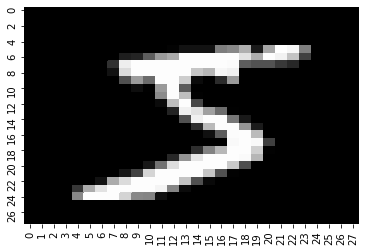

The next image's label is 0:


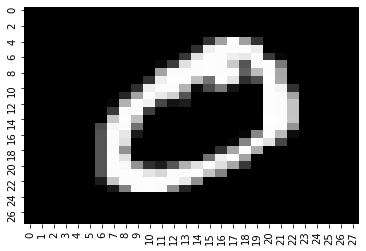

The next image's label is 4:


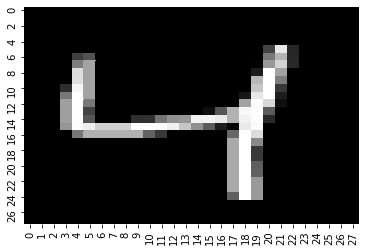

In [ ]:
def plot_digit_image(img):
  sns.heatmap(np.array(img).reshape([28, 28]), cmap='gray', cbar=False)

#plot the first few images along with their labels
for i in range(3):
  print(f'The next image\'s label is {mnist_labels[i]}:')
  plot_digit_image(mnist_obs.loc[i])
  mpl.pyplot.show()

## Murdock (1962) Free Recall dataset

The Murdock (1962) free recall dataset is organized into a tar file with the following structure (non-essential files and folders are omitted):

```
Murd62:
├── fr10-2.txt
├── fr15-2.txt
├── fr20-1.txt
├── fr20-2.txt
├── fr30-1.txt
└── fr40-1.txt
```

In the experiment, six groups of participants studied random word lists and then wrote down as many words as they could remember, in any order they wished.  Across different experimental conditions, Murdock systematically varied the list length (i.e., the number of words participants in that condition studied on each list) and the presentation rate.

Each `.txt` file comprises data from one experimental condition.  The first number in each filename (after `fr`) denotes the list length and the second number in each filename (after the hyphen) denotes the presentation rate, in Hz.  For example, the `fr10-2.txt` file includes data from participants who studied 10-word lists presented at a rate of 2 words per second.  Each row of each file corresponds to one participant/trial.  For example, if a row contains the sequence:

```
20 19 18 15 1 5 8
```

then that means that the participant wrote down the 20th-presented word first, followed by the 19th word, and so on.  The code `88` means that the participant wrote down a word that had not appeared on the list they had studied.  Any other invalid entries (i.e., values other than 88 that are greater than the list length, or values that are less than or equal to 0) should be ignored.

In [ ]:
import os
import tarfile
import urllib.request as get
from glob import glob as lsdir

# fetch and extract a tarfile stored remotely
def extract_remote_tarfile(url):
  stream = get.urlopen(url)
  tf = tarfile.open(fileobj=stream, mode='r|gz')
  tf.extractall()

# load a text file
def txt_loader(fname):
  with open(fname, 'r') as f:
    return f.read()

In [ ]:
murdock_url = 'http://memory.psych.upenn.edu/files/pubs/Murd62.data.tgz'

In [ ]:
extract_remote_tarfile(murdock_url)
murdock_root = 'Murd62'

In [ ]:
def load_murdock_file(fname):
  data = txt_loader(fname).split('\n')
  
  #create a list of lists from the data
  recalls = [[int(x) if ((int(x) > 0) or (int(x) == 88)) else np.nan for x in d.strip().split(' ')] for d in data if len(d.strip()) > 0]
  df = pd.DataFrame(recalls)
  df.index.rename('List', inplace=True)
  df.columns.name = 'Recall'
  return df

In [ ]:
murdock_data = {os.path.split(f)[1][2:-4]: load_murdock_file(f) for f in lsdir(os.path.join(murdock_root, 'fr*.txt'))}

The dictionary `murdock_data` has keys corresponding to the experimental conditions ('10-2', '15-2', '20-1', '20-2', '30-1', and '40-1').  Each value in the dictionary is a `DataFrame` whose rows each reflect a single participant's recalls for a single list, and whose columns reflect individual responses (recalls).  Note that the total number of columns in each condition's DataFrame is equal to the *maximum* number of responses across all lists and participants, for that condition.  Any lists that received fewer responses will be padded with `NaN`s.  Some rows may also contain *all* `NaN`s if there were no valid responses for that list.

As an example, let's take a look at the recall data for the first lists from the `20-2` condition:

In [ ]:
murdock_data['20-2'].head()

Recall,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
List,,,,,,,,,,,,,,,
0,12,7,10,20.0,15.0,19.0,6.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,20,18,10.0,14.0,11.0,15.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,19,20,9.0,11.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,88,17,10.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,20,17,18.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Matrix operations and data wrangling with NumPy and Pandas

## Example digits

In the MNIST dataset, what are the similarities and differences between images of the same digit?  Let's explore this by creating two functions:
  - `average_digit` should take in `mnist_obs` (`obs`), `mnist_labels` (`labels`), and an integer between 0 and 9, inclusive (`digit`).  The function should return a 28 by 28 NumPy array containing the average image for the given digit.
  - `std_digit` should take in `mnist_obs` (`obs`), `mnist_labels` (`labels`), and an integer between 0 and 9, inclusive (`digit`).  The function should return a 28 by 28 NumPy array containing the standard deviation (across images) for each pixel, for the given digit.

In [ ]:
def average_digit(obs, labels, digit):
  ### BEGIN YOUR CODE
  pass
  ### END YOUR CODE

def std_digit(obs, labels, digit):
  ### BEGIN YOUR CODE
  pass
  ### END YOUR CODE

You can check your functions by attempting to produce the heatmaps below:

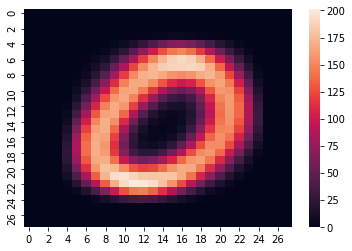

In [ ]:
sns.heatmap(average_digit(mnist_obs, mnist_labels, 0));

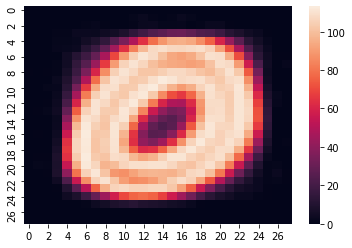

In [ ]:
sns.heatmap(std_digit(mnist_obs, mnist_labels, 0));

Now let's create a mosaic of the averages and standard deviations across images:
- The mosaic should be returned as a single NumPy array
- Every block of 28 x 28 pixels should reflect data for one digit
- The *columns* of the mosaic should reflect the digits 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9 (in that order)
- The top *row* of the mosaic should show the mean images for each digit
- The bottom *row* of the mosaic should show the pixel-wise standard deviations (across images) for each digit

In [ ]:
def mosaic(obs, labels, rows=[average_digit, std_digit], columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  ### BEGIN YOUR CODE
  pass
  ### END YOUR CODE

Now let's display the full mosaic as a heatmap:

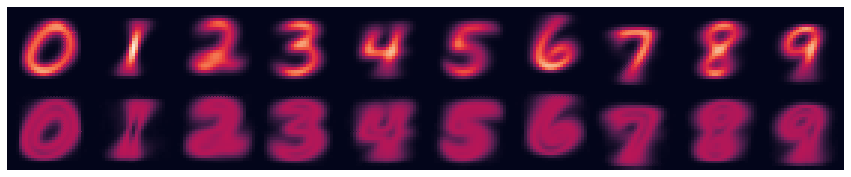

In [ ]:
fig, ax = mpl.pyplot.subplots(figsize=[15, 3]);
sns.heatmap(mosaic(mnist_obs, mnist_labels), ax=ax, cbar=False);
ax.get_xaxis().set_visible(False);
ax.get_yaxis().set_visible(False);

## Serial position curves

A *serial position curve* computes the average probability of recalling each item on a studied list as a function of its presentation position.

Fill in the contents of the `spc` function skeleton below.
- Your function should be able take in any DataFrame in the same format as those in the Murdock (1962) dataset.  You should return a DataFrame with a single row, whose columns are list presentation positions.  Optionally, the user may pass in an experimental condition string (`cond`) denoting the list length, then a hyphen, and then the presentation rate (e.g. `'10-2'`).
- When passed multiple DataFrames in a dictionary, you should return a DataFrame with one row per inputted DataFrame, where the columns denote presentation positions and the rows are indexed by the dictionary's keys. (Hint: set `cond=k` for `k` in `dict.keys()`.)
- Any entries with no data should be denoted as `NaN`s.

Implementation notes:
- The 10-2 condition's data file has an extra row in it.  This error is part of the original Murdock (1962) dataset.  When the `load_murdock_file` function loads in the dataset, the dataframe for the 10-2 condition will have an extra row of `NaN`s in it-- just treat that row as a list where no words were recalled.
- In the original Murdock (1962) serial position curves below, you'll notice that the list positions begin with 1 and end with postion equal to the list length.  In your implementation, you should use 0-indexing (the first serial position should be 0 and the last should be list length minus 1).

In [ ]:
def spc(df, cond=''):
  ### BEGIN YOUR CODE
  pass
  ### END YOUR CODE

In [ ]:
#compute serial position curves
spcs = spc(murdock_data)

Plot the serial position curves (compare with Figure 1 from [Murdock (1962)](https://www.dropbox.com/s/3wyy2b2xlqygokf/Murd62.pdf)):

![Serial position curves](https://raw.githubusercontent.com/ContextLab/cs-for-psych/master/assignments/library-tour/figs/Murd62_SPCs.png)

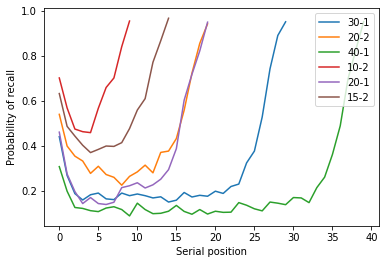

In [ ]:
spcs.T.plot(xlabel='Serial position', ylabel='Probability of recall');

# Exploratory analyses with HyperTools and SciPy

A good "first step" towards understanding many datasets is to examine how the observations are related.  The HyperTools library provides some convenient ways of visualizing high-dimensional data.  Let's start by using HyperTools to explore the MNIST dataset.  We'll:
  - Convert each digit image into a high-dimensional feature vector
  - Use [Uniform Manifold Approximation and Projection (UMAP)](https://arxiv.org/pdf/1802.03426.pdf) to project the feature vectors onto a 2D plane
  - Plot each image's (reduced) feature vector as a single point
  - Color each point according to that image's ground truth label

In the example below, we'll start by defining a dictionary of UMAP parameters (this step is not strictly necessary, but here I've chosen a set of parameters that I know will produce a "nice looking" projection).  Then we'll use the `hyp.plot` function to visualize the dataset (see the [API specification](https://hypertools.readthedocs.io/en/latest/api.html) for details about each parameter):


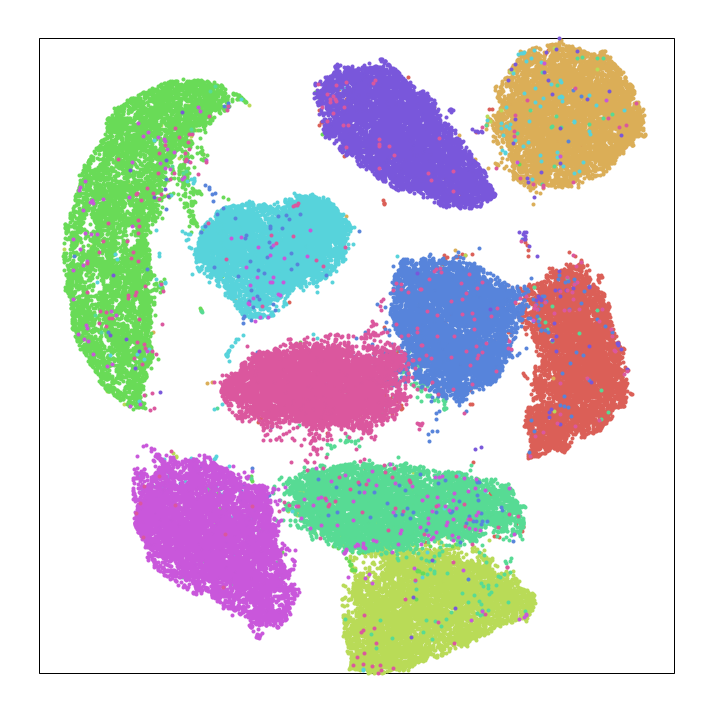

In [ ]:
import random
random.seed(a=132) #this will guarantee consistency across different runs of the notebook

params = {'n_neighbors': 5, 'min_dist': 0.3, 'metric': 'correlation'}
hyp.plot(mnist_obs, '.', reduce={'model': 'UMAP', 'params': params}, hue=np.array(mnist_labels), ndims=2, size=[10, 10]);

The fact that we can see 10 distinct clusters of dots, each with distinct (and largely uniform) colors, means that the digit images are (mostly) separable.  In other words, images of the same digit tend to be similar to each other, and images of different digits tend to be different from each other.  When we see well-defined clusters like in this example, it is a good indication that classifiers will be able to distinguish between the clusters.  We could gain additional insights by asking other questions about the data that are driven by the above visualization.  For example:
  - Which clusters (or data labels) are spread out versus compact?  More compact clusters indicate greater uniformity.
  - Which clusters show intermixing?  This indicates potential for confusion across clusters, or potential relations across labels or conditions.
  - Which clusters are nearby versus distant?  This indicates which observations are similar versus different from each other.

# Machine learning with Scikit-Learn

Let's learn about scikit-learn by training a [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) classifier to identity the digit labels.

First, we'll use the `skl.model_selection.train_test_split` function to divide the dataset into a training set (which we'll use to train our classifier-- i.e., to fit the model's parameters) and a testing set (which we'll use to evaluate the classifier's performance.

In [ ]:
mnist_train_obs, mnist_test_obs, mnist_train_labels, mnist_test_labels = skl.model_selection.train_test_split(mnist_obs, mnist_labels, test_size=0.25, random_state=10)

#print out some details of the training and test sets
print(f'The original dataset has {len(mnist_labels)} observations.')
print(f'After splitting, the training set has {len(mnist_train_labels)} observations and the test set has {len(mnist_test_labels)} observations.')

The original dataset has 70000 observations.
After splitting, the training set has 52500 observations and the test set has 17500 observations.


Next, let's set up the classifier and fit it to the training data (we'll stick with the default classifier options and parameters):

In [ ]:
classifier = skl.linear_model.LogisticRegression()
classifier.fit(mnist_train_obs, mnist_train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

And now that the classifier has been trained, we can feed in new images that the classifier hasn't "seen" yet and get predicted labels:

In [ ]:
predicted_test_labels = classifier.predict(mnist_test_obs)

Finally, let's print out a report summarizing how the classifier performed, along with a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix):

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1757
           1       0.96      0.98      0.97      1901
           2       0.91      0.90      0.90      1784
           3       0.89      0.91      0.90      1804
           4       0.94      0.92      0.93      1708
           5       0.89      0.85      0.87      1566
           6       0.93      0.96      0.94      1657
           7       0.94      0.92      0.93      1873
           8       0.88      0.87      0.87      1720
           9       0.89      0.92      0.91      1730

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



Confusion matrix:


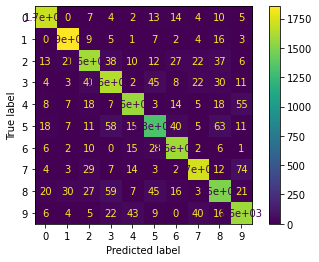

In [ ]:
print(skl.metrics.classification_report(mnist_test_labels, predicted_test_labels))

print('\n\nConfusion matrix:')
skl.metrics.ConfusionMatrixDisplay.from_estimator(classifier, mnist_test_obs, mnist_test_labels);

We've achieved 92% accuracy (accuracy = 0.92)-- not bad!

In the example above, we used the keyword argument `test_size=0.25` (passed to `train_test_split`) to specify that 75% of the dataset should be used for training and 25% should be used for testing.  How does our classifier's performance (on the test set) vary as a function of the training versus test set size?

Write a function to compute the classification accuracy as a function of test size.  Your function should:

1. Take in a list of test sizes (either floats to specify proportions, or numbers of samples)
2. For each test size in turn, use `train_test_split` (specifying `random_state=10`) to divide the dataset into training and test sets
3. Train a logisitic regression classfier (with all of its default arguments) on the training data
4. Predict the labels for the test data and compute the accuracy (accuracy is the number of correctly labeled test examples divided by the total number of test examples).  Note: this should be a float between 0 and 1, inclusive.
5. Return a list of the resulting accuracies (in the same order as the test size list that you passed into the function)

In [ ]:
def accuracy_by_test_size(data, labels, sizes):
  ### BEGIN YOUR CODE
  pass
  ### END YOUR CODE


Example use and figure to help with debugging (think about how you could use a plot like this to help you decide how to divide up your data into training versus test sets!):

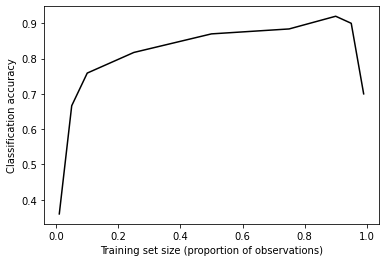

In [ ]:
sizes = [0.99, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1, 0.05, 0.01]
accuracies = accuracy_by_test_size(mnist_obs.iloc[:1000], mnist_labels[:1000], sizes)

mpl.pyplot.plot(1 - np.array(sizes), accuracies, color='k');
mpl.pyplot.xlabel('Training set size (proportion of observations)');
mpl.pyplot.ylabel('Classification accuracy');

# Data visualization with Matplotlib and Seaborn

On the last stop on this tour, your job is to create a bar plot using `mpl.pyplot.bar`.  You should match the example figure below as closely as possible to get full credit:

![reference figure](https://raw.githubusercontent.com/ContextLab/cs-for-psych/master/assignments/library-tour/figs/accuracy_by_condition_reference.png)

Here are the details:
- Sort the conditions in the Murdock (1962) dataset in ascending order of the proportion of words recalled
- Each condition gets 1 bar
- The x-positions of each bar should be in increments of 1, starting with the leftmost bar at 1 (since there are six conditions in the experiment, the rightmost bar should have an x-position of 6).
- The bar heights should indicate the average proportion of words recalled in each condition.
- Use the `yerr` keyword argument to display confidence intervals (default: `confidence=95`-- i.e., ranging from the bottom 2.5th percentile to the top 2.5th percentile).  The `np.percentile` function may come in handy for this!
- Make all bars gray (`color='gray'`) and all lines black (`'k'`)
- Set the errorbar capsize to 10 points
- Hints:
  - You may find it useful to use `pd.DataFrame.apply` to add a new "proportion recalled" column to each dataset.  You could do this in a compact way using a lambda function!
  - The `spc` function you wrote above can be leveraged to write the `plot_performance_by_condition` function.
  - See the [API reference](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.bar.html) for `pyplot.bar` for more information about how to make bar plots using Matplotlib.
  - You may find `np.argsort` useful for sorting one list or array based on the elements of another.

In [ ]:
def plot_performance_by_condition(data, confidence=95, outfile=None):
  fig, ax = mpl.pyplot.subplots()

  ### BEGIN YOUR CODE
  pass
  ### END YOUR CODE

  if outfile is not None:
    fig.savefig(outfile)  
  return fig, ax

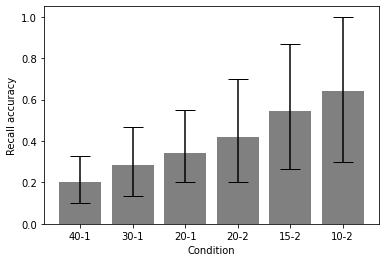

In [ ]:
fig, ax = plot_performance_by_condition(murdock_data);

# Some closing thoughts

Congratulations-- your library tour is complete!  The examples covered in this assignment are really just the tip of the iceberg; each of the libraries you toured may be applied to wide ranges of analyses, datasets, and question spaces.  Becoming fluent in these tools can give you data science superpowers.  Have fun and discover something cool!

In [ ]:
#used by autograder-- do not modify
def compare_figures(a, b, tolerance=0.9):
  '''
  Return True iff a and b are the same image, excluding values of 0 and 1, or
  transparency (alpha) values.

  At least (100*tolorance)% of the values must "close" (as measured by
  '''
  def imread(url, *args, **kwargs):
    if os.path.exists(url):
      return mpl.pyplot.imread(url)
    else:
      return mpl.pyplot.imread(get.urlopen(url))

  a = imread(a)[:, :, :3].ravel() #ignore transparency
  b = imread(b)[:, :, :3].ravel()

  inds = ((a != 0) & (a != 1)) | ((b != 0) & (b != 1))
  return (np.sum(np.isclose(a[inds], b[inds])) / np.sum(inds)) >= tolerance